# Fashion MNIST Project

In [81]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [82]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [85]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [86]:
(trainX,trainY), (testX,testY) = fashion_mnist.load_data()

In [87]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\yasmi\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [88]:
trainX.shape

(60000, 28, 28)

**The class labels for Fashion MNIST are:**

Label :          0                1            2           3        4       5        6        7         8       9                


Description :    T-shirt/top  ,  Trouser  ,  Pullover ,   Dress ,   Coat,    Sandal ,  Shirt,    Sneaker ,  Bag   ,  Ankle boot


Our dataset consists 60,000 images and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

In [89]:
class_names = ['pants', 'sneakers','coat','shirt']

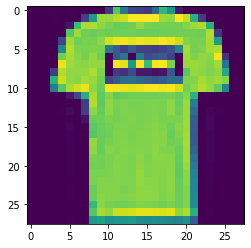

In [90]:
plt.imshow(trainX[1].reshape((28,28)))
plt.show()

# Feature Scaling

Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, and this range is too wide , hence we would need to use feature scaling here to apply standardization to this dataset X_train, so that all the values of each feature (pixel) is in a small range (based on the standard deviation value).

**x_scaled = (x - x_mean) / standard deviation**

**Scaling is not needed for Decision Tree and Random Forest algorithms**

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

Since, we have multiple classes (unique values - 0,1,2,...9) for the label in the target dataset y_train, its a 'multi-class' Classification problem.
There are two strategies which we can use multiple binary classifiers for multiclass classification. They are

(1) One-versus-all (OvA) strategy 
(2) One-versus-one (OvO) strategy

In OvA strategy, to create a system that can classify the digit images into 10 classes (from 0 to 9), we train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when we want to classify an image, we get the decision score from each classifier for that image and we select the class whose classifier outputs the highest score.

We will use OvA strategy for this multi-class Classification problem since Scikit Learn by default uses OvA strategy internally for multi class Classification.

# Shuffling the training set

**Shuffling the training dataset** - to get uniform samples for cross validation

We need to shuffle our training data to ensure that we don't miss out any digit in a cross validation fold.

**Cross-validation** is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

**Lets check a certian image at a certien index before shuffling**

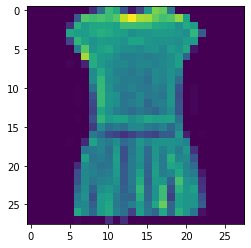

In [93]:
plt.imshow(trainX[3].reshape((28,28)))
plt.show()

In [94]:
import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
trainX, trainY = trainX[shuffle_index], trainY[shuffle_index]

**Now lets print the same index image after shuffling**

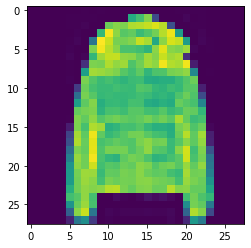

In [95]:
plt.imshow(trainX[3].reshape((28,28)))
plt.show()

# Logistic Regression Model

In [96]:
trainX = trainX.reshape((60000, 28, 28, 1))
testX = testX.reshape((10000, 28, 28, 1))

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [97]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [98]:
train_images_norm = trainX / 255.0
test_images_norm = testX / 255.0

In [99]:
image_train = trainX.reshape(60000,784)
image_test = testX.reshape(10000,784)

In [100]:
X_train = pd.DataFrame(image_train)
Y_train = trainY
X_test = pd.DataFrame(image_test)
Y_test = testY
print(Y_train)
X_train

[8 8 7 ... 6 6 1]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,4,0,29,136,105,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,1,0,0,...,0,0,0,196,207,108,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,11,...,2,4,0,73,97,93,72,0,0,0
59998,0,0,0,0,0,0,0,74,208,55,...,26,27,30,40,9,0,0,0,0,0


In [64]:
prediction_test  = logReg.predict(X_test)
prediction_train = logReg.predict(X_train)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [66]:
print(accuracy_score(Y_train, prediction_train))

0.8815166666666666


In [67]:
print(accuracy_score(Y_test, prediction_test))

0.8323


In [104]:
log_clf = LogisticRegression(solver ='sag',multi_class='auto',max_iter = 10000)
log_clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [106]:
Y_train[0]

8

In [109]:
y_train_predict[0]

7

In [108]:
y_train_predict = log_clf.predict(X_train_scaled)

In [110]:
log_accuracy = accuracy_score(Y_train, y_train_predict)
log_precision = precision_score(Y_train, y_train_predict, average='weighted')
log_recall = recall_score(Y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(Y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.10033333333333333
Logistic Precision:  0.09999519773803567
Logistic Recall:  0.09999519773803567
Logistic F1 Score:  0.08663296646308424


# Ensamle Learning with XGBoost 

In [114]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=300, n_jobs=-1, seed=0)
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [115]:
y_pred = xgb_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9039


In [116]:
y_train_predict = xgb_clf.predict(X_train)

In [117]:
xgb_accuracy = accuracy_score(Y_train, y_train_predict)
xgb_precision = precision_score(Y_train, y_train_predict, average='weighted')
xgb_recall = recall_score(Y_train, y_train_predict, average='weighted')
xgb_f1_score = f1_score(Y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)
print("XGBoost Precision: ", xgb_precision)
print("XGBoost Recall: ", xgb_precision)
print("XGBoost F1 Score: ", xgb_f1_score)

XGBoost Accuracy:  1.0
XGBoost Precision:  1.0
XGBoost Recall:  1.0
XGBoost F1 Score:  1.0


# Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier


In [122]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
dec_tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

In [123]:
y_train_predict = dec_tree_clf.predict(X_train)

In [124]:
dec_tree_accuracy = accuracy_score(Y_train, y_train_predict)
dec_tree_precision = precision_score(Y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(Y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(Y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


# Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, Y_train)

In [ ]:
y_train_predict = rnd_clf.predict(X_train)

In [ ]:
rnd_accuracy = accuracy_score(Y_train, y_train_predict)
rnd_precision = precision_score(Y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(Y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(Y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

# Ensemble Learning with Soft Voting

**Soft Voting**                                                                                                                  
In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

In [ ]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, Y_train)


In [ ]:
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train_predict = voting_clf.predict(X_train_scaled)

In [ ]:
voting_accuracy = accuracy_score(Y_train, y_train_predict)
voting_precision = precision_score(Y_train, y_train_predict, average='weighted')
voting_recall = recall_score(Y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(Y_train, y_train_predict, average='weighted')


print("Ensemble Accuracy: ", voting_accuracy)
print("Ensemble Precision: ", voting_precision)
print("Ensemble Recall: ", voting_precision)
print("Ensemble F1 Score: ", voting_f1_score)